<a href="https://colab.research.google.com/github/dildarshah96/stochastic-process-simulation/blob/main/RP_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

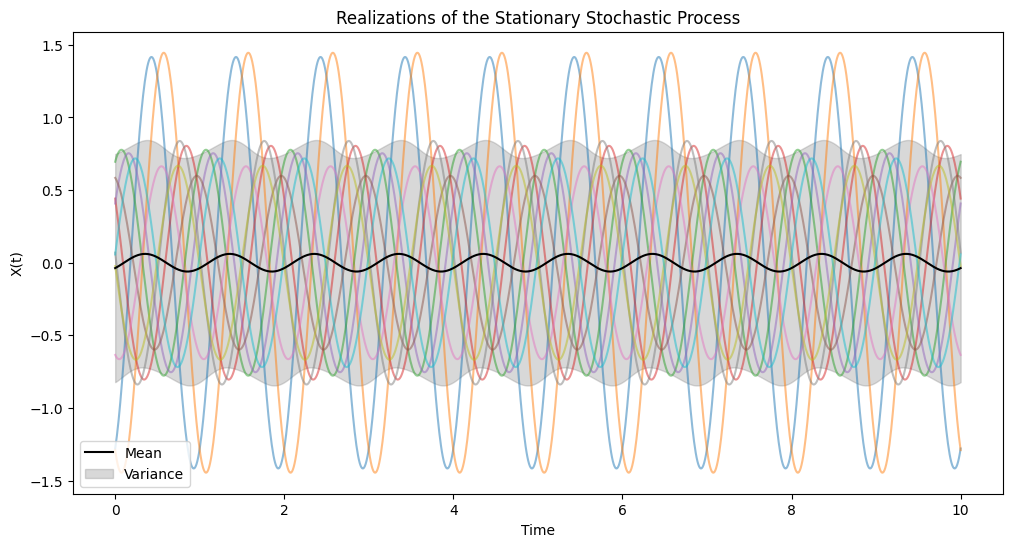

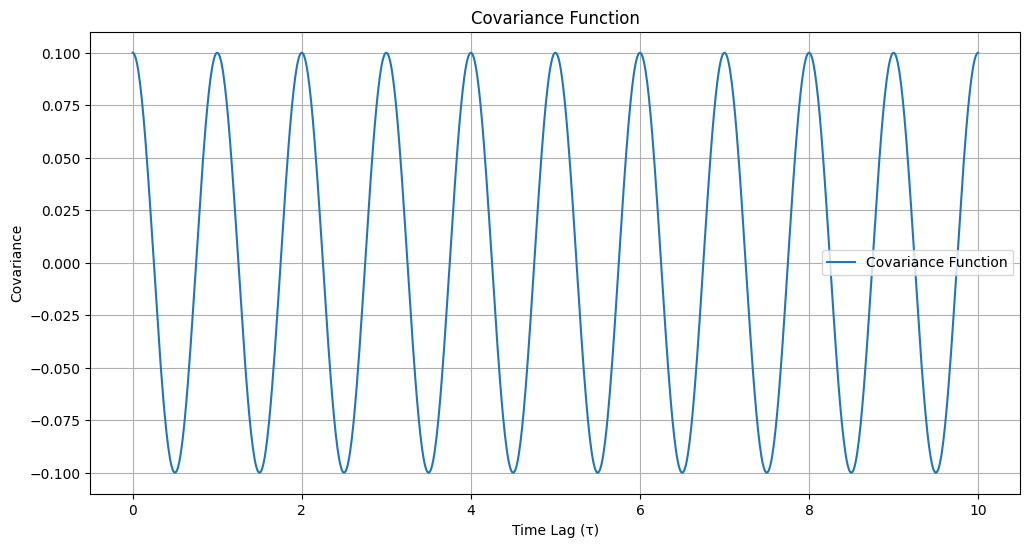

Mean: -3.701961116964081e-05
Variance: 0.6086161361096257
Covariance: 9.999999999998676e-05


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Parameters
f0 = 1  # Frequency
A_mean = 1  # Mean of the amplitude
sigma_squared = 0.1  # Variance of the process

# Time vector
time_end = 10  # End time for the simulation
num_points = 1000
t = np.linspace(0, time_end, num_points)

# Function to generate a single realization
def generate_realization(t, A_mean, sigma_squared):
    A = np.random.lognormal(mean=np.log(A_mean), sigma=np.sqrt(sigma_squared))
    phi = np.random.uniform(0, 2 * np.pi)
    return A * np.cos(2 * np.pi * f0 * t + phi)

# Generate multiple realizations
num_realizations = 1000
realizations = np.array([generate_realization(t, A_mean, sigma_squared) for _ in range(num_realizations)])

# Calculate mean and variance
mean = np.mean(realizations, axis=0)
variance = np.var(realizations, axis=0)

# Calculate covariance function
tau_values = np.linspace(0, time_end, num_points)
covariance_function = sigma_squared * np.cos(2 * np.pi * f0 * tau_values)

# Plotting the realizations
plt.figure(figsize=(12, 6))
for realization in realizations[:10]:  # Plot only the first 10 for clarity
    plt.plot(t, realization, alpha=0.5)

plt.plot(t, mean, label='Mean', color='black')
plt.fill_between(t, mean - np.sqrt(variance), mean + np.sqrt(variance), color='gray', alpha=0.3, label='Variance')
plt.legend()
plt.title('Realizations of the Stationary Stochastic Process')
plt.xlabel('Time')
plt.ylabel('X(t)')
plt.show()

# Plot covariance function
plt.figure(figsize=(12, 6))
plt.plot(tau_values, covariance_function, label='Covariance Function')
plt.title('Covariance Function')
plt.xlabel('Time Lag (τ)')
plt.ylabel('Covariance')
plt.grid(True)
plt.legend()
plt.show()

# Print mean, variance, and covariance
print("Mean:", np.mean(mean))
print("Variance:", np.mean(variance))
print("Covariance:", np.mean(covariance_function))
